# Carregamento, limpeza e preparação dos dados


In [7]:
# Carregando os pacotes
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# dicionário - informações sobre as variáveis
dic = pd.read_excel('data/dicionario-limpo.xlsx', skiprows=1)
# retirando as linhas vazias
w = dic.Tamanho.dropna(axis=0).values
ww = w.astype(int)
df = pd.read_fwf('data/PNS_2019.txt', header=None, dtype=str, widths=ww)

desc = dic.iloc[1:, 4].dropna(axis=0)
nomes = dic.iloc[1:,2].dropna(axis=0)
df.columns = nomes
df = df.apply(pd.to_numeric)
data = {
    'V0001': [11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53],
    'estado': ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará',
               'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 
               'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 
               'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
    'IDH': [0.737, 0.663, 0.674, 0.707, 0.646, 0.708, 0.699, 0.639, 0.646, 0.682, 0.684, 0.658, 0.673, 0.631, 0.665, 0.673, 
            0.731, 0.740, 0.761, 0.783, 0.749, 0.774, 0.746, 0.729, 0.725, 0.735, 0.824],
    'expectativa_vida_ibge': [74.0, 73.0, 73.6, 71.5, 72.7, 73.9, 73.4, 71.7, 70.9, 73.1, 74.7, 74.3, 73.9, 71.6, 72.7, 73.5, 
                            76.3, 77.2, 76.5, 77.8, 76.7, 78.4, 77.7, 75.2, 74.5, 74.8, 77.6]
}

df_idh = pd.DataFrame(data)

df_analises0 = df.merge(df_idh, how="left", on="V0001")
# df_analises = df_analises.groupby("Estado").mean()
df_analises0.head()

#2.19

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,A01001,A011,A005010,A005012,A00601,A009010,A01401,A01402,A01403,A01501,A016010,A018011,A018012,A018013,A018014,A018015,A018016,A018017,A018018,A018019,A018020,A018021,A018022,A018023,A018024,A018025,A018026,A018027,A018028,A01901,A02101,A02102,A02201,A02305,A02306,A02307,A02308,A02401,A02402,B001,B002,B003,B004,C001,C00301,C004,C006,C00701,C00702,C00703,C008,C009,C01001,C010010,C013,C014,C015,C016,C017,C018,C01801,C011,C012,D001,D00201,D00202,D00301,D00501,D006,D00601,D007,D008,D00901,D010,D01101,D01201,D01301,D01302,D01303,D014,D015,E001,E002,E003,E004,E005,E006011,E008,E010010,E010011,E010012,E010013,E011,E01201,E01401,E014011,E01402,E01403,E01501,E01601,E01602,E01603,E01604,E01605,E017,E01801,E01802,E01803,E01804,E01805,E019,E022,E023011,E024011,E02402,E024021,E025,E02501,E02502,E02503,E026,E02601,E02801,E02802,E02803,E02804,E02805,E02806,E030,E03101,E03102,E03103,E03104,E03105,E03106,E03107,E03108,E032,E033,E027,F001011,F001021,F007011,F007021,F008011,F008021,VDF001,VDF00102,F016,I00101,I00102,I001021,I00103,I001031,I005,I006,I004,I00401,I00402,I00403,I00404,I010010,I012,J001,J00101,J002,J003,J00402,J00404,J005,J006,J007,J00801,J009,J01002,J01101,J012,J01301,J014,J01502,J01602,J01701,J01802,J019,J02002,J021,J022010,J023,J024,J025,J026,J02702,J02901,J03001,J03102,J032,J03301,J034,J035,J03602,J037,J038,J039,J04001,J04002,J041,J042,J043,J044,J046,J047,J048,J049,J051,J052,J05301,J05402,J05403,J05404,J05405,J05406,J05407,J05408,J05409,J054010,J056,J057,J060,M001,M002,M00203,M00302,M00303,M00401,M00402,M005010,M005011,M00601,M007,M008,M009,M01001,M011011,M011021,M011031,M011041,M011051,M011061,M011071,M01401,M01501,M01601,M01701,M01801,M01901,N001,N00101,N004,N005,N006,N00701,N008,N010,N011,N012,N013,N014,N015,N016,N017,N018,O00101,O00401,O00402,O00501,O00201,O00701,O00801,O00802,O00803,O009,O00901,O010,O01102,O01401,O01501,O01602,O01702,O019,O02001,O021,O02101,O02201,O023,O02401,P00102,P00103,P00104,P00201,P00402,P00403,P00404,P00405,P005,P00601,P00602,P00603,P00604,P00605,P00607,P00608,P00609,P00610,P00611,P00612,P00613,P00614,P00615,P00616,P00617,P00618,P00619,P00620,P00621,P00622,P00623,P006,P00901,P01001,P01101,P013,P015,P02001,P02101,P01601,P018,P019,P02002,P02102,P023,P02401,P02501,P02602,P02601,P027,P02801,P029,P03201,P03202,P03001,P03301,P03302,P03303,P034,P035,P03701,P03702,P036,P038,P039,P03904,P03905,P03906,P040,P04001,P04101,P04102,P042,P04301,P04302,P044,P04401,P04405,P04406,P04501,P04502,P046,P04701,P04801,P04902,P050,P051,P052,P053,P05401,P05402,P05403,P05404,P05405,P05406,P05407,P05408,P05409,P05410,P05411,P05412,P05413,P05414,P05415,P05416,P05417,P05418,P05419,P05421,P05422,P055,P058,P05801,P05802,P05901,P05902,P05903,P05904,P05905,P05906,P060,P06101,P06102,P06103,P06104,P06105,P06106,P06302,P067,P06701,P068,P069,P06901,P07004,P07005,P07006,P07007,P07101,P07201,Q00101,Q00201,Q00202,Q003,Q00401,Q00502,Q00503,Q00601,Q00602,Q00801,Q009,Q010,Q01101,Q01202,Q014,Q015,Q016,Q017,Q018010,Q018011,Q018012,Q018013,Q018014,Q018015,Q018016,Q018017,Q01910,Q019101,Q01911,Q019111,Q01912,Q019121,Q01913,Q019131,Q022,Q02301,Q026,Q02701,Q028,Q02901,Q03001,Q03002,Q031,Q03201,Q03302,Q03303,Q03403,Q03404,Q03601,Q03701,Q03801,Q03802,Q03803,Q03804,Q03805,Q03806,Q03807,Q03901,Q04002,Q042,Q043,Q044,Q045,Q046011,Q046012,Q046013,Q046014,Q046015,Q046016,Q046017,Q046018,Q046019,Q046020,Q046021,Q04707,Q047071,Q04708,Q047081,Q04709,Q047091,Q04710,Q047101,Q04711,Q047111,Q050,Q05101,Q05301,Q05401,Q055011,Q055012,Q055013,Q055014,Q055015,Q055016,Q056,Q05701,Q058,Q05901,Q060,Q061,Q06207,Q06208,Q06209,Q06210,Q06211,Q06212,Q06306,Q06307,Q06308,Q06309,Q06310,Q06311,Q064,Q06506,Q06507,Q06508,Q06509,Q06601,Q067,Q068,Q070,Q07208,Q07209,Q07210,Q07211,Q07212,Q07213,Q073,Q074,Q075,Q076,Q07601,Q07704,Q07705,Q07706,Q07707,Q07708,Q07709,Q07710,Q07711,Q078,Q079,Q080,Q08107,Q08108,Q08109,Q08110,Q08111,Q082,Q083,Q084,Q085,Q08607,Q08608,Q08609,Q08610,Q08611,Q087,

In [8]:
df_analises = df_analises0.copy()

In [9]:

# estava elegível para responder
#df_analises = df_analises[df_analises["V0025A"] == 1]  # respondente +15anos
#df_analises = df_analises[df_analises["C008"] >= 18]    # ajustando a idade para +18anos


fator_ajuste = df_analises.shape[0] / df_analises["V00291"].sum()  

# ajuste por indivíduo
df_analises["fator_ajuste"] = df_analises["V00291"] * fator_ajuste
df_analises = df_analises.dropna(subset=["fator_ajuste"])

# perguntas selecionadas
columns =  ["estado", "fator_ajuste", "V00291","C008", "P00901", "P018", "P035", "P03201", "N00101","D00901","D014","E01201","E01602","E01802","F001021","F007021","F008021","VDF00102"]
df_analises = df_analises[columns].copy()

# preencher com 2 perguntas nao respondidas 
df_analises["P03201"] = df_analises["P03201"].fillna(2) # pergunta sobre alcool se nulo é atribuido Não (Não é equivalente ao 2)
df_filtered = df_analises

df_filtered.head()

,estado,fator_ajuste,V00291,C008,P00901,P018,P035,P03201,N00101,D00901,D014,E01201,E01602,E01802,F001021,F007021,F008021,VDF00102
0,Rondônia,0.643296,368.875166,55.0,1.0,3.0,1.0,2.0,3.0,5.0,1.0,5221.0,100.0,NaN,NaN,NaN,NaN,NaN
9,Rondônia,0.886108,508.107083,19.0,4.0,0.0,NaN,1.0,2.0,10.0,2.0,5132.0,500.0,NaN,NaN,NaN,NaN,NaN
10,Rondônia,1.072160,614.791943,45.0,7.0,7.0,NaN,2.0,1.0,10.0,1.0,9112.0,1000.0,NaN,NaN,NaN,NaN,NaN
18,Rondônia,0.214432,122.958389,58.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,9112.0,240.0,NaN,NaN,NaN,NaN,84.0
19,Rondônia,0.211513,121.284625,28.0,3.0,3.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# identificando motoristas

#833   CONDUTORES DE CAMINHÕES PESADOS E ÔNIBUS
#8331  CONDUTORES DE ÔNIBUS E BONDES
#8332  CONDUTORES DE CAMINHÕES PESADOS

df_filtered['motorista'] = df_filtered['E01201'].isin([833, 8331, 8332]).map({True: 'Sim', False: 'Não'})

df_filtered.head()

,estado,fator_ajuste,V00291,C008,P00901,P018,P035,P03201,N00101,D00901,D014,E01201,E01602,E01802,F001021,F007021,F008021,VDF00102,motorista
0,Rondônia,0.643296,368.875166,55.0,1.0,3.0,1.0,2.0,3.0,5.0,1.0,5221.0,100.0,NaN,NaN,NaN,NaN,NaN,Não
9,Rondônia,0.886108,508.107083,19.0,4.0,0.0,NaN,1.0,2.0,10.0,2.0,5132.0,500.0,NaN,NaN,NaN,NaN,NaN,Não
10,Rondônia,1.072160,614.791943,45.0,7.0,7.0,NaN,2.0,1.0,10.0,1.0,9112.0,1000.0,NaN,NaN,NaN,NaN,NaN,Não
18,Rondônia,0.214432,122.958389,58.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,9112.0,240.0,NaN,NaN,NaN,NaN,84.0,Não
19,Rondônia,0.211513,121.284625,28.0,3.0,3.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não


In [11]:
# ajustando renda

df_filtered[["E01602","E01802","F001021","F007021","F008021","VDF00102"]] = df_filtered[["E01602","E01802","F001021","F007021","F008021","VDF00102"]].fillna(0)
df_filtered ['renda'] = df_filtered ["E01602"] + df_filtered ["E01802"]+df_filtered ["F001021"]+ df_filtered ["F007021"]+ df_filtered ["F008021"] + df_filtered ["VDF00102"]

df_filtered.drop(columns=["E01602","E01802","F001021","F007021","F008021","VDF00102"], inplace=True)

df_filtered.head()

,estado,fator_ajuste,V00291,C008,P00901,P018,P035,P03201,N00101,D00901,D014,E01201,motorista,renda
0,Rondônia,0.643296,368.875166,55.0,1.0,3.0,1.0,2.0,3.0,5.0,1.0,5221.0,Não,100.0
9,Rondônia,0.886108,508.107083,19.0,4.0,0.0,NaN,1.0,2.0,10.0,2.0,5132.0,Não,500.0
10,Rondônia,1.072160,614.791943,45.0,7.0,7.0,NaN,2.0,1.0,10.0,1.0,9112.0,Não,1000.0
18,Rondônia,0.214432,122.958389,58.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,9112.0,Não,324.0
19,Rondônia,0.211513,121.284625,28.0,3.0,3.0,1.0,2.0,2.0,NaN,NaN,NaN,Não,0.0


In [12]:
# ajustando educação

df_rename = df_filtered.copy()

mapa_educacao = {
    1: "Sem instrução (nunca frequentou a escola ou não concluiu nenhuma série)",
    2: "Sem instrução (nunca frequentou a escola ou não concluiu nenhuma série)",
    3: "Sem instrução (nunca frequentou a escola ou não concluiu nenhuma série)",
    4: "Fundamental",
    5: "Fundamental",
    6: "Fundamental",
    7: "Fundamental",
    8: "Fundamental",
    9: "Médio",
    10: "Médio",
    11: "Médio",
    12: "Superior",
    13: "Superior",
    14: "Superior",
    15: "Superior"
}

df_rename["D00901"] = df_rename["D00901"].map(mapa_educacao)

df_rename["D014"] = df_rename["D014"].map({1: "Sim", 2: "Não"})

def combinar_educacao(row):
    if pd.isnull(row['D00901']):
        return None
    elif "Sem instrução" in row['D00901']:
        return row['D00901']
    elif row['D014'] == 'Não':
        return f"{row['D00901']} Incompleto"
    else:  # inclui casos onde D014 == 'Sim' ou D014 é nulo
        return f"{row['D00901']} Completo"

df_rename['educacao'] = df_rename.apply(combinar_educacao, axis=1)
df_rename.drop(columns=['D00901', 'D014'], inplace=True)

# def padronizar_educacao(valor):
#     if valor == 'Fundamental Incompleto':
#         return 'Sem instrução (nunca frequentou a escola ou não concluiu nenhuma série)'
#     elif valor == 'Médio Incompleto':
#         return 'Fundamental Completo'
#     elif valor == 'Superior Incompleto':
#         return 'Médio Completo'
#     elif isinstance(valor, str) and any(x in valor for x in ['Esp', 'M', 'D']):
#         return 'Superior'
#     else:
#         return valor

# df_rename['educacao'] = df_rename['educacao'].apply(padronizar_educacao)

mapa_mys = {
    'Sem instrução (nunca frequentou a escola ou não concluiu nenhuma série)': 0,
    'Fundamental Completo': 9,
    'Fundamental Incompleto': 4.5,
    'Médio Incompleto': 10.5,
    'Médio Completo': 12,
    'Superior Incompleto': 14,
    'Superior Completo': 16
}

df_rename['anos_estudo'] = df_rename['educacao'].map(mapa_mys)
df_rename.drop(columns=['educacao'], inplace=True)

# mapa_eys = {
#     'Sem instrução (nunca frequentou a escola ou não concluiu nenhuma série)': 0,
#     'Fundamental Incompleto': 4.5,
#     'Fundamental Completo': 9,
#     'Médio Incompleto': 1.5,
#     'Médio Completo': 3,
#     'Superior Incompleto': 2,
#     'Superior Completo': 4
# }

# df_rename['duracao_nivel_educacao'] = df_rename['educacao'].map(mapa_eys)

df_rename[["anos_estudo"]] = df_rename[["anos_estudo"]].fillna(0)

df_rename.rename(columns={'C008': 'age'}, inplace=True)
df_rename.head()

,estado,fator_ajuste,V00291,age,P00901,P018,P035,P03201,N00101,E01201,motorista,renda,anos_estudo
0,Rondônia,0.643296,368.875166,55.0,1.0,3.0,1.0,2.0,3.0,5221.0,Não,100.0,9.0
9,Rondônia,0.886108,508.107083,19.0,4.0,0.0,NaN,1.0,2.0,5132.0,Não,500.0,10.5
10,Rondônia,1.072160,614.791943,45.0,7.0,7.0,NaN,2.0,1.0,9112.0,Não,1000.0,12.0
18,Rondônia,0.214432,122.958389,58.0,3.0,3.0,3.0,2.0,3.0,9112.0,Não,324.0,0.0
19,Rondônia,0.211513,121.284625,28.0,3.0,3.0,1.0,2.0,2.0,NaN,Não,0.0,0.0


In [13]:
# media ponderada

df_ponderada = df_rename.copy()

# Colunas que terão valores substituídos pela média ponderada
colunas_ponderadas = ["P00901", "P018", "P035", "P03201", "N00101", "renda", "anos_estudo"]

# Função de média ponderada
def weighted_mean(group, value_column, weight_column):
    return (group[value_column] * group[weight_column]).sum() / group[weight_column].sum()

# Calcular as médias ponderadas por grupo
df_ponderadas = df_rename.groupby(["estado"]).apply(
    lambda group: pd.Series({
        col: weighted_mean(group, col, "fator_ajuste")
        for col in colunas_ponderadas
    })
).reset_index()

df_ponderadas

/tmp/ipykernel_75235/2686109663.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ponderadas = df_rename.groupby(["estado"]).apply(


,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo
0,Acre,3.748588,3.282403,1.154556,1.864959,2.160954,1430.278661,6.444712
1,Alagoas,4.016337,3.827324,1.364298,1.870901,2.262246,1141.995528,5.608455
2,Amapá,3.933227,3.720827,1.689949,1.817703,2.239335,1340.542266,6.919867
3,Amazonas,4.092107,3.574976,1.331450,1.871200,2.085123,1301.963895,6.784980
4,Bahia,4.080068,3.900775,1.481649,1.807879,2.281865,1257.823363,5.642560
5,Ceará,3.311669,3.953498,1.506315,1.859602,2.252431,1271.688537,6.088747
6,Distrito Federal,5.039976,4.579721,2.000296,1.813148,1.975582,3173.144094,8.966940
7,Espírito Santo,4.969262,3.786228,1.402282,1.825738,2.078004,1817.032668,7.261203
8,Goiás,4.910139,3.709091,1.358644,1.827141,2.074273,1731.468312,7.167282
9,Maranhão,3.304405,3.700798,1.310651,1.846407,2.288425,932.725913,5.516609


In [14]:
df_ponderadas.to_csv("data/dados_entrada_idh_estado.csv")

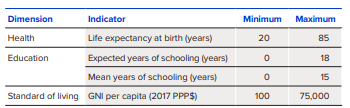

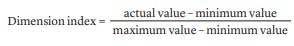

In [ ]:
# para calculo do MYS:
    # pegar quem tem mais de 25 anos
    # somar anos de estudo e dividir pelo numero total de individuos com mais de 25 anos

def calcular_mys(df, idade_minima=25, coluna_idade='age', coluna_anos_estudo='anos_estudo'):
    df_filtrado = df[df[coluna_idade] > idade_minima]
    mys = df_filtrado[coluna_anos_estudo].mean()
    return mys

mys_geral = calcular_mys(df_dummies)

df_motoristas = df_dummies[df_dummies['motorista'] == 'Sim']
mys_motoristas = calcular_mys(df_motoristas)

mys_por_estado = df_dummies.groupby('estado').apply(calcular_mys).reset_index(name='mys')

In [ ]:
# dummies na educação para cálculo do eys
df_dummies = df_rename.copy()
df_dummies = pd.get_dummies(df_dummies, columns=['educacao'], prefix='educacao')
df_dummies.head()

In [ ]:
df_dummies.info()

In [ ]:
# para calculo do EYS:
    # para toda a população
    # considerando apenas nivel completo
    # verificar a razao de quantos completaram o nivel x a duracao_nivel_educacao

def calcular_eys_com_duracoes_fixas(df):
    duracoes_fixas = {
        'educacao_Sem instrução (nunca frequentou a escola ou não concluiu nenhuma série)': 0,
        'educacao_Fundamental Completo': 9,
        'educacao_Médio Completo': 12,
        'educacao_Superior Completo': 16,
    }

    total_pessoas = len(df)
    eys_total = 0.0

    for col, duracao in duracoes_fixas.items():
        if col in df.columns:
            proporcao = df[col].sum() / df[col].notna().sum()
            eys_total += proporcao * duracao

    return eys_total

eys_geral = calcular_eys_com_duracoes_fixas(df_dummies)

df_motoristas = df_dummies[df_dummies['motorista'] == 'Sim']
eys_motoristas = calcular_eys_com_duracoes_fixas(df_motoristas)


def calcular_eys_por_estado(df):
    return df.groupby('estado').apply(calcular_eys_com_duracoes_fixas).reset_index(name='eys')
eys_estado = calcular_eys_por_estado(df_dummies)


In [ ]:
# para o calculo do indice educacional:
    # indice educacional = 0.5 *( MYS/15  + EYS/18 )

# Criar tabela com geral e motoristas
df_geral_motoristas = pd.DataFrame({
    'categoria': ['Geral', 'Motoristas'],
    'mys': [mys_geral, mys_motoristas],
    'eys': [eys_geral, eys_motoristas],
})

# Calcular índice educacional para geral e motoristas
df_geral_motoristas['indice_educacional'] = 0.5 * ((df_geral_motoristas['mys'] + df_geral_motoristas['eys']) / 18)

# Mostrar a tabela formatada
print("\n📊 Índice Educacional – Geral e Motoristas")
display(df_geral_motoristas.round(4))

# Calcular índice educacional por estado
df_educacional_estado = pd.merge(mys_por_estado, eys_estado, on='estado')
df_educacional_estado['indice_educacional'] = 0.5 * ((df_educacional_estado['mys'] + df_educacional_estado['eys']) / 18)

# Ordenar e exibir
df_educacional_estado = df_educacional_estado.sort_values(by='indice_educacional').reset_index(drop=True)

print("\n📍 Índice Educacional por Estado")
display(df_educacional_estado[['estado', 'mys', 'eys', 'indice_educacional']].round(4))


Nota metodológica sobre o Índice Educacional:

O índice educacional apresentado nesta análise é construído a partir da média de anos de estudo (MYS) e dos anos de escolaridade efetivamente alcançados (EYS) por indivíduos com 18 anos ou mais. Diferentemente do cálculo oficial do IDH-Educação (PNUD/ONU), que utiliza o EYS como uma expectativa de escolarização futura para crianças em idade escolar (com base em taxas de matrícula), aqui o EYS reflete a realidade educacional já atingida por adultos, considerando apenas os que completaram níveis educacionais.

Essa abordagem resulta em valores mais conservadores quando comparada aos índices internacionais, pois incorpora interrupções de trajetória escolar e desigualdades históricas de acesso à educação. O uso exclusivo de indivíduos com mais de 18 anos torna o indicador mais adequado ao perfil da população analisada — como motoristas e trabalhadores adultos — e o divisor de 15 anos foi mantido para garantir consistência entre os componentes do índice.

In [ ]:
# df_ie
df_ie = df_rename.merge(
    df_educacional_estado[['estado', 'indice_educacional']],
    on='estado',
    how='left')


df_ie.rename(columns={'indice_educacional': 'ie_estado'}, inplace=True)
df_ie.drop(columns=['educacao',	'anos_estudo',	'duracao_nivel_educacao'], inplace=True)
df_ie.head()

In [ ]:
# Extrair os valores diretamente da tabela de categorias
ie_brasil = df_geral_motoristas.loc[df_geral_motoristas['categoria'] == 'Geral', 'indice_educacional'].values[0]
ie_motoristas = df_geral_motoristas.loc[df_geral_motoristas['categoria'] == 'Motoristas', 'indice_educacional'].values[0]

# Atribuir os valores fixos às novas colunas
df_ie['ie_brasil'] = ie_brasil
df_ie['ie_motoristas'] = ie_motoristas
df_ie.head()

In [ ]:
# Colunas que terão valores substituídos pela média ponderada
colunas_ponderadas = ["P00901", "P018", "P035", "P03201", "N00101", "renda"]

# Função de média ponderada
def weighted_mean(group, value_column, weight_column):
    return (group[value_column] * group[weight_column]).sum() / group[weight_column].sum()

# Calcular as médias ponderadas por grupo
df_ponderadas = df_ie.groupby(["estado", "motorista"]).apply(
    lambda group: pd.Series({
        col: weighted_mean(group, col, "fator_ajuste")
        for col in colunas_ponderadas
    })
).reset_index()

# Substituir os valores originais pelas médias ponderadas via merge
df_ie = df_ie.drop(columns=colunas_ponderadas).merge(
    df_ponderadas,
    on=["estado", "motorista"],
    how="left"
)
df_ie.head()

In [ ]:

numerical_columns = df_ie.select_dtypes(include="number")
correlacoes = numerical_columns.corr()["ie_estado"]

print("\nCorrelação com Expectativa de Vida:")
display(correlacoes)
#28s


In [ ]:
df_ie.head()

In [ ]:

df_renda = df_ie.copy()

def calcular_indice_renda(renda_media, renda_min=100, renda_max=75000):
    return (np.log(renda_media) - np.log(renda_min*2.43)) / (np.log(renda_max*2.43) - np.log(renda_min*2.43))  # R$ 2,43 como taxa de conversão para 1 dólar internacional (PPP)


renda_brasil = df_renda["renda"].mean()
ir_brasil = calcular_indice_renda(renda_brasil)

renda_motoristas = df_renda[df_renda["motorista"] == "Sim"]["renda"].mean()
ir_motoristas = calcular_indice_renda(renda_motoristas)

renda_por_estado = df_renda.groupby("estado")["renda"].mean().reset_index(name="renda_media")
renda_por_estado["indice_renda"] = renda_por_estado["renda_media"].apply(calcular_indice_renda)


df_indice_renda = pd.concat([
    pd.DataFrame({
        "escopo": ["Brasil", "Motoristas"],
        "estado": [None, None],
        "renda_media": [renda_brasil, renda_motoristas],
        "indice_renda": [ir_brasil, ir_motoristas]
    }),
    renda_por_estado.assign(escopo="Estado")[["escopo", "estado", "renda_media", "indice_renda"]]
], ignore_index=True)


df_renda_final = df_ie.merge(
    df_indice_renda[df_indice_renda["escopo"] == "Estado"][["estado", "indice_renda"]],
    on="estado",
    how="left"
).rename(columns={"indice_renda": "ir_estado"})


df_renda_final["ir_brasil"] = ir_brasil
df_renda_final["ir_motoristas"] = ir_motoristas

df_renda_final.head()



In [ ]:
df_ir = df_renda_final.copy()


# 1. Função para calcular o Índice de Saúde (PNUD)
def calcular_indice_saude(ev, ev_min=20, ev_max=85):
    return (ev - ev_min) / (ev_max - ev_min)

# 2. Calcular a média de expectativa de vida por estado
ev_por_estado = df_ir.groupby("estado")["expectativa_vida_ibge"].mean().reset_index(name="ev_media")
ev_por_estado["is_estado"] = ev_por_estado["ev_media"].apply(calcular_indice_saude)

# 3. Calcular índice de saúde geral do Brasil
ev_brasil = df_ir["expectativa_vida_ibge"].mean()
is_brasil = calcular_indice_saude(ev_brasil)

# 4. Calcular índice de saúde para motoristas
ev_motoristas = df_ir[df_ir["motorista"] == "Sim"]["expectativa_vida_ibge"].mean()
is_motoristas = calcular_indice_saude(ev_motoristas)

# 5. Merge com df_renda para adicionar is_estado
df_ir = df_ir.merge(ev_por_estado[["estado", "is_estado"]], on="estado", how="left")

# 6. Adicionar colunas fixas para Brasil e Motoristas
df_ir["is_brasil"] = is_brasil
df_ir["is_motoristas"] = is_motoristas

df_ir.head()

In [ ]:
df_ir.loc[df_ir.estado == "Santa Catarina"].head(1)

In [ ]:
df_idh = df_ir.copy()

# 1. Função oficial do PNUD para cálculo do IDH (geométrica)
def calcular_idh(ie, ir, is_):
    return (ie * ir * is_) ** (1/3)

# 2. Calcular IDH Brasil
idh_brasil = calcular_idh(
    df_idh["ie_brasil"].iloc[0],
    df_idh["ir_brasil"].iloc[0],
    df_idh["is_brasil"].iloc[0]
)

# 3. Calcular IDH Motoristas
idh_motoristas = calcular_idh(
    df_idh["ie_motoristas"].iloc[0],
    df_idh["ir_motoristas"].iloc[0],
    df_idh["is_motoristas"].iloc[0]
)

# 4. Calcular IDH por estado e gerar tabela auxiliar
idh_estado_df = (
    df_idh[["estado", "ie_estado", "ir_estado", "is_estado"]]
    .drop_duplicates()
    .assign(idh_estado=lambda d: (d["ie_estado"] * d["ir_estado"] * d["is_estado"]) ** (1/3))
)[["estado", "idh_estado"]]

# 5. Criar cópia de df_renda e adicionar as colunas fixas
df_idh = df_idh.copy()
df_idh["idh_brasil"] = idh_brasil
df_idh["idh_motoristas"] = idh_motoristas

# 6. Merge com IDH por estado
df_idh = df_idh.merge(idh_estado_df, on="estado", how="left")

df_idh.head()


In [ ]:
df_idh.to_csv("data/idh_pns_2019.csv")
dic.to_csv("data/dic.csv")

In [ ]:
resumo_comparativo.loc[resumo_comparativo.estado == 'Santa Catarina'].drop_duplicates()

In [ ]:
resumo_comparativo = df_idh[['idh_estado','estado', 'ir_estado','ie_estado','is_estado']].drop_duplicates()
resumo_comparativo

In [ ]:
df_idh.loc[df_idh.estado == 'Santa Catarina'].drop_duplicates()